 # Report


# Function 

In [5]:
param_api_id = "nvcYjWgATTnM-2QUzsnervit1aUVuYm."
param_api_secret = "g-ocD5qgc3v8iqePwWe2.kriGRIeZOjFY9DZhLDV6yjj0A.-GmxwifIZgu7O_CXnJDEXLbLOqTgvN3zSP9o5Xo2nb48iHHQsm5iQ"

In [6]:
import baseline_model as model
#import baseline_24 as model
from dataloader import Dataloader
from evaluation import Evaluator
import os

# Main function calling everything
def f(date_from, date_to, api_id, api_secret):
    dl_config_path = os.path.join('config', 'config.yml')
    eval_config_path = os.path.join('config', 'evaluation_config.yml')

    # Load Data
    print("Loading Data...")
    dataloader = Dataloader(dl_config_path, '2022-12-25', date_to, api_id, api_secret)
    dataframe = dataloader.load()

    # Preprocess Data
    dataframe.fillna(0.0, inplace=True)
    
    # Pass entire Dataframe to model (which might not use all cols/rows)
    print("Predicting the weather...")
    market_strategy = model.predict(date_from, date_to, dataframe)

    # Evaluate strategy passing the same Dataframe to the evaluator
    print("Evaluating the prediction...")
    evaluator = Evaluator(
        start= date_from,
        end = date_to, 
        evalution_config_path=eval_config_path,
        dataframe=dataframe,
        result_df=market_strategy
        )
    evaluation = evaluator.evaluate()
    
    # Export Evaluation
    print("Exporting...")
    evaluation['E_prod_forecast'] = evaluation.loc[:, 'E_sold_spot'] # No intraday trading
    evaluation.to_csv('final_results.csv', columns=['E_prod_real', 'E_prod_forecast', 'E_sold_spot', 'E_sold_intraday', 'PnL_per_hour'])
    
    # Aggregate PnL
    aggregate = evaluation['PnL_per_hour'].sum()
    print(f"Aggregate PnL: {aggregate}")
    return evaluation

In [7]:
result_df = f('2023-08-01', '2024-01-31', param_api_id, param_api_secret)

Loading Data...
Predicting the weather...
Evaluating the prediction...
Exporting...
Aggregate PnL: 557383.6839740087


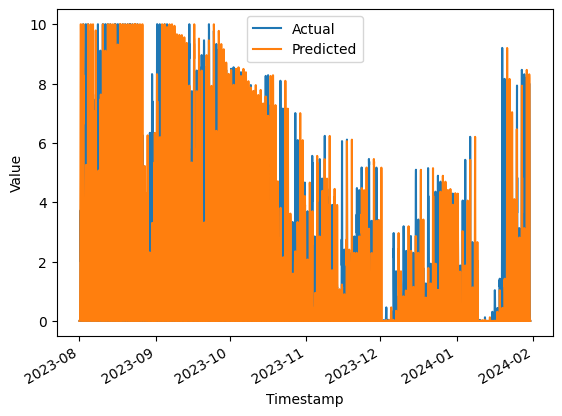

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
# result_df[['timestamp', 'E_sold_spot', 'actual_pv_production']].plot()
df = result_df
plt.plot(df['timestamp'], df['E_prod_real'], label='Actual')
plt.plot(df['timestamp'], df['E_sold_spot'], label='Predicted')
# plt.plot(df['timestamp'], df['pnl'], label='Penalty')
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

plt.show()